In [228]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math as m

In [229]:
def propagationStep(pose_init, time_init, time_new, left_vel, right_vel, radius, width, left_var, right_var):
    particle_set = []
    change_time = time_new - time_init

    for x in pose_init:
        x = np.array(x)
        left_vel_error = left_vel + np.random.normal(0,left_var)
        right_vel_error = right_vel + np.random.normal(0,right_var)

        omega_dot = [[0, -radius/width*(right_vel_error-left_vel_error), radius/2*(right_vel_error+left_vel_error)],[radius/width*(right_vel_error-left_vel_error),0,0],[0,0,0]]
        particle_set.append(np.dot(x, linalg.expm(np.dot(change_time,omega_dot))))
    
    return particle_set


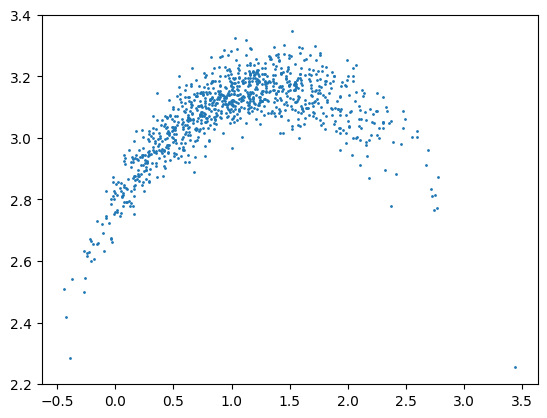

In [230]:
x_0 = [[1,0,0],[0,1,0],[0,0,1]]

pose_init = []

for i in range(1000):
    pose_init.append(x_0)

time_init = 0
time_next = 10
velocity_left = 1.5
velocity_right = 2
radius = 0.25
width = 0.5
varience_left = 0.05
varience_right = 0.05

pose_next = propagationStep(pose_init, time_init, time_next, velocity_left, velocity_right, radius, width, varience_left, varience_right)

x = []
y = []
for pose in pose_next:
    x.append(pose[0][2])
    y.append(pose[1][2])

plt.scatter(x,y,s=1)
plt.show()

var1: [0.02046375 0.0170466 ]
mean1: (1.657003310512645,1.1903639748734727)
var2: [0.26912427 0.0144497 ]
mean2: (1.058753207819925,3.101614885915921)
var3: [0.30110247 0.3373653 ]
mean3: (-0.9133931003304687,3.1230725055749597)
var4: [0.2199124  0.60549284]
mean4: (-1.543042717120202,1.2800488020115621)


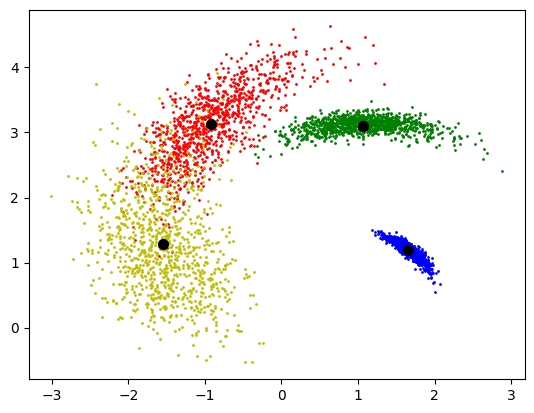

In [231]:
times = [0,5,10,15,20]
color = ['b','g','r','y']
particleSets = []

for index in range(len(times)):
    if (index == 0):
        particleSets.append(propagationStep(pose_init, time_init, times[index], velocity_left, velocity_right, radius, width, varience_left, varience_right))
    else:
        particleSets.append(propagationStep(particleSets[index-1], times[index-1],times[index], velocity_left, velocity_right, radius, width, varience_left, varience_right))


for index in range(len(particleSets)):
    x = []
    y = []
    points = []
    for pose in particleSets[index]:
        x.append(pose[0][2])
        y.append(pose[1][2])
        points.append((pose[0][2],pose[1][2]))

    if (index != 0):
        varience = np.var(points, axis=0)
        print("var"+str(index)+": "+str(varience))
        print("mean"+str(index)+": ("+str(np.mean(x))+","+str(np.mean(y))+")")
        plt.scatter(x,y,s=1,color=color[index-1])
        plt.scatter(np.mean(x), np.mean(y),s = 50, color='black')
        

In [232]:
def updateStep(poses, measurement, varience):
    weights = []
    zt = np.array(measurement)
    update = []

    for x in poses:
        lt = np.array([x[0][2],x[1][2]])
        ep = zt-lt
        square = ep.dot(ep)
        div1 = -square/varience**2
        exp = m.exp(div1)
        div2 = varience * (2*m.pi)**2
        result = exp/div2
        weights.append(result)

    list_of_indices = np.random.choice(range(len(poses)), len(poses), weights)

    for index in list_of_indices:
        update.append(poses[index])
    
    return update
    

var1: [0.01879667 0.01523575]
mean1: (1.6634705437866333,1.1798534198434933)
var2: [0.23116855 0.01339433]
mean2: (1.0913865930588271,3.1054501724188857)
var3: [0.23365251 0.26890367]
mean3: (-0.9110373891892277,3.178753711426956)
var4: [0.2136263  0.53131244]
mean4: (-1.6048513635161954,1.350183199991241)


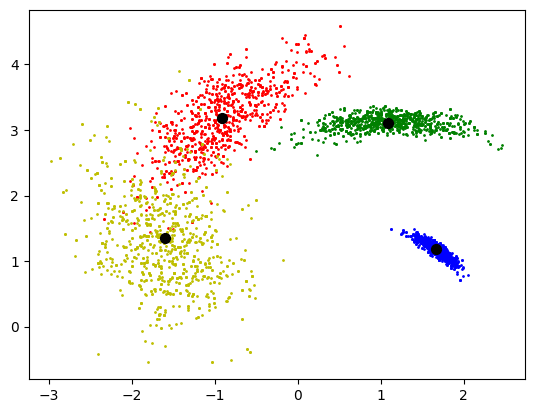

In [234]:
measurements = [(1.6561, 1.2847), (1.0505,3.1059),(-0.9875,3.2118), (-1.6450,1.1978)]
varience = 0.1

times = [0,5,10,15,20]
color = ['b','g','r','y']
particleSets = []

for index in range(len(times)):
    if (index == 0):
        particleSets.append(propagationStep(pose_init, time_init, times[index], velocity_left, velocity_right, radius, width, varience_left, varience_right))
    else:
        prop = propagationStep(particleSets[index-1], times[index-1],times[index], velocity_left, velocity_right, radius, width, varience_left, varience_right)
        particleSets.append(updateStep(prop, measurements[index-1], varience))

for index in range(len(particleSets)):
    x = []
    y = []
    points = []
    for pose in particleSets[index]:
        x.append(pose[0][2])
        y.append(pose[1][2])
        points.append((pose[0][2],pose[1][2]))

    if (index != 0):
        varience = np.var(points, axis=0)
        print("var"+str(index)+": "+str(varience))
        print("mean"+str(index)+": ("+str(np.mean(x))+","+str(np.mean(y))+")")
        plt.scatter(x,y,s=1,color=color[index-1])
        plt.scatter(np.mean(x), np.mean(y),s = 50, color='black')